In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparation

In [2]:
df = pd.read_csv('dict.csv', names=['conversation_id', 'raw_tweets_info'])
df.head()

,conversation_id,raw_tweets_info
0,0,"[(739565681776164864, 245011122)]"
1,1,"[(739565686754705408, 198191432)]"
2,2,"[(739565730891464705, 2158887092), (7395609423..."
3,3,"[(739565751787528192, 38646613)]"
4,4,"[(739565819965935616, 4344532409)]"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124956 entries, 0 to 124955
Data columns (total 2 columns):
conversation_id    124956 non-null int64
raw_tweets_info    124956 non-null object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


## Data Wrangling

In [4]:
tweet_ids = []
for conv in list(df['raw_tweets_info']):
    ids = []
    for tweet in eval(conv):
        ids.append(tweet[0])
    tweet_ids.append(ids)
print('Sample Tweet ids of conversations')
print(f'{tweet_ids[:5]}\n')

user_ids = []
for conv in list(df['raw_tweets_info']):
    ids = []
    for tweet in eval(conv):
        ids.append(tweet[1]) 
    user_ids.append(ids)

print('Sample user ids in conversation:')
tweet_ids[:5]

Sample Tweet ids of conversations
[[739565681776164864], [739565686754705408], [739565730891464705, 739560942376259584], [739565751787528192], [739565819965935616]]

Sample user ids in conversation:


[[739565681776164864],
 [739565686754705408],
 [739565730891464705, 739560942376259584],
 [739565751787528192],
 [739565819965935616]]

In [5]:
df['tweet_ids'] = tweet_ids
df['user_ids'] = user_ids

In [6]:
df['conversation_length'] = [len(eval(tweet)) for tweet in list(df['raw_tweets_info'])]

In [7]:
df.head()

,conversation_id,raw_tweets_info,tweet_ids,user_ids,conversation_length
0,0,"[(739565681776164864, 245011122)]",[739565681776164864],[245011122],1
1,1,"[(739565686754705408, 198191432)]",[739565686754705408],[198191432],1
2,2,"[(739565730891464705, 2158887092), (7395609423...","[739565730891464705, 739560942376259584]","[2158887092, 2183268807]",2
3,3,"[(739565751787528192, 38646613)]",[739565751787528192],[38646613],1
4,4,"[(739565819965935616, 4344532409)]",[739565819965935616],[4344532409],1


In [8]:
df['conversation_length'].value_counts()

1    124499
2       448
3         9
Name: conversation_length, dtype: int64

In [9]:
# Get only rows where there actually is a conversation
df = df[df['conversation_length'] > 1]

In [10]:
# Black magic
keys = ["KLM", "AirFrance", "British_Airways", "AmericanAir", "Lufthansa", "AirBerlin", "AirBerlin assist", "easyJet", "RyanAir", "SingaporeAir", "Qantas", "EtihadAirways", "VirginAtlantic"]
values = ["56377143", "106062176", "18332190", "22536055", "124476322", "26223583", "2182373406", "38676903", "1542862735", "253340062", "218730857", "45621423", "20626359"]
values = [int(value) for value in values]
airline_dict = dict(zip(keys, [int(value) for value in values]))

airlines = []
for row in list(df['user_ids']):
    if bool(set(list(row)).intersection(values)):
        airline_ids = set((list(row))).intersection(values)
        extracted_airlines = [keys for keys,values in airline_dict.items() if values == list(airline_ids)[0]]
        airlines.append(extracted_airlines[0])
    else:
        airlines.append('No airlines involved')

In [11]:
airlines[:5]

['No airlines involved',
 'No airlines involved',
 'No airlines involved',
 'No airlines involved',
 'No airlines involved']

In [12]:
df['airlines_involved'] = airlines

## Exploration of new dataframe

In [13]:
df.head()

,conversation_id,raw_tweets_info,tweet_ids,user_ids,conversation_length,airlines_involved
2,2,"[(739565730891464705, 2158887092), (7395609423...","[739565730891464705, 739560942376259584]","[2158887092, 2183268807]",2,No airlines involved
58,58,"[(739566848157569027, 157574171), (73951945900...","[739566848157569027, 739519459006816256]","[157574171, 157574171]",2,No airlines involved
77,77,"[(739567295429627904, 219995045), (73955845160...","[739567295429627904, 739558451601248256]","[219995045, 219995045]",2,No airlines involved
83,83,"[(739567393849106432, 79447915), (739515629334...","[739567393849106432, 739515629334626304]","[79447915, 19973673]",2,No airlines involved
206,206,"[(739569215598960640, 141980503), (73919975208...","[739569215598960640, 739199752085082112]","[141980503, 141980503]",2,No airlines involved


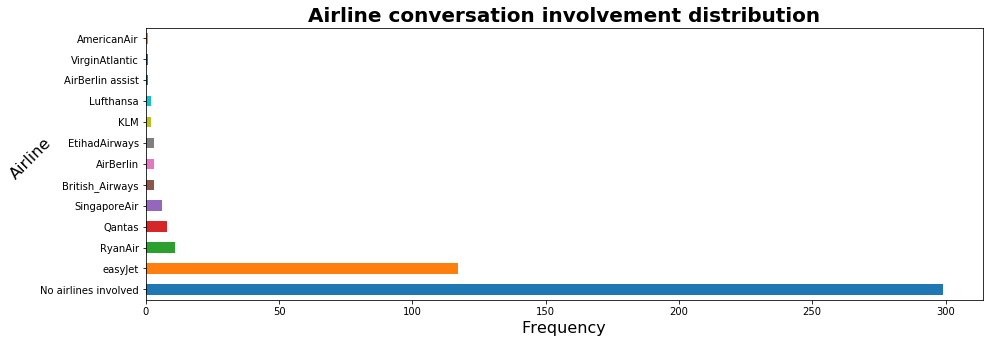

In [14]:
df['airlines_involved'].value_counts().plot(kind='barh', figsize=(15,5))
plt.title('Airline conversation involvement distribution', weight='bold', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Airline', fontsize=16, rotation=45);
#plt.savefig('Airline conversation involvement', dpi=300)

## Save to csv

In [15]:
df.to_csv('conversations_10_jsons.csv', index=False)

## Final Check

In [16]:
df = pd.read_csv('conversations_10_jsons.csv')
display(df.info())
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
conversation_id        457 non-null int64
raw_tweets_info        457 non-null object
tweet_ids              457 non-null object
user_ids               457 non-null object
conversation_length    457 non-null int64
airlines_involved      457 non-null object
dtypes: int64(2), object(4)
memory usage: 21.5+ KB


None

,conversation_id,raw_tweets_info,tweet_ids,user_ids,conversation_length,airlines_involved
0,2,"[(739565730891464705, 2158887092), (7395609423...","[739565730891464705, 739560942376259584]","[2158887092, 2183268807]",2,No airlines involved
1,58,"[(739566848157569027, 157574171), (73951945900...","[739566848157569027, 739519459006816256]","[157574171, 157574171]",2,No airlines involved
2,77,"[(739567295429627904, 219995045), (73955845160...","[739567295429627904, 739558451601248256]","[219995045, 219995045]",2,No airlines involved
3,83,"[(739567393849106432, 79447915), (739515629334...","[739567393849106432, 739515629334626304]","[79447915, 19973673]",2,No airlines involved
4,206,"[(739569215598960640, 141980503), (73919975208...","[739569215598960640, 739199752085082112]","[141980503, 141980503]",2,No airlines involved


,conversation_id,conversation_length
count,457.000000,457.000000
mean,40393.037199,2.019694
std,26844.754970,0.139098
min,2.000000,2.000000
25%,12826.000000,2.000000
50%,41958.000000,2.000000
75%,63804.000000,2.000000
max,109916.000000,3.000000
